## Table of content:
* [Introduction](#introduction) 
* [Exploratory Data Analysis](#eda)
    * [Statistical Analysis](#statistical)
    * [Outliers](#outliers)
    * [Missing Data](#missing)
    * [Data Cleaning](#DC)
* [Training ML-Model](#model)
    * [Data preprocessing](#preprocessing)
    * [Scaling Numerical Features (Normalization)](#SNF)
    * [Encoding Categorical Columns](#ECC)
    * [Feature Importance](#featureImp)
* [Conclusion](#conclusion)

## Introduction <a class="anchor" id="introduction"></a>

The dataset has 16 columns which are:<br>
<a class="anchor" id="columns"></a><br>
ID<br>
Price: price of the care(Target Column)<br>
Levy<br>
Manufacturer<br>
Model<br>
Prod. year<br>
Category<br>
Leather interior<br>
Fuel type<br>
Engine volume<br>
Mileage<br>
Cylinders<br>
Gear box type<br>
Drive wheels<br>
Doors<br>
Wheel<br>
Color<br>
Airbags<br>

#### Importing the neccessary libraries

In [1]:
# Libraries
import numpy as np 
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
# ANN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

In [2]:
# Reading the dataset
dataset = pd.read_csv('../input/car-price-prediction-challenge/car_price_prediction.csv',index_col = False)



In [3]:
# Displaying 5 random samples from the dataset first 5 data
data = dataset.copy()
data.sample(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
14641,45741892,17562,781,SUBARU,Outback,2012,Jeep,No,Petrol,2.5,118000 km,4.0,Tiptronic,4x4,04-May,Left wheel,Black,12
1916,45760543,53314,-,MERCEDES-BENZ,Viano,2013,Minivan,Yes,Diesel,2.2 Turbo,250000 km,4.0,Tiptronic,Rear,04-May,Left wheel,Grey,7
10422,45778746,9095,-,NISSAN,Tiida,2005,Hatchback,Yes,Petrol,1.5,140000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Black,6
1696,45768719,392,761,TOYOTA,Corolla,2010,Sedan,Yes,Petrol,1.8,0 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
11490,45650449,1725,1363,MERCEDES-BENZ,ML 350,2012,Jeep,Yes,Diesel,4.6,180659 km,8.0,Automatic,4x4,04-May,Left wheel,Black,12


In [4]:
data.shape

(19237, 18)

In [5]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

18 Columns present in the dataset. See full meaning for each of the columns [here](#columns)

### Statistical analysis <a class="anchor" id="statistical"></a>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

The dataset contains both numerical and categorical data.

We can confirm further by checking for missing value counts and a graphical display to check as well 

In [7]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
print('The minimum price is: ', data['Price'].min())
print('The maximum price is: ', data['Price'].max())

The minimum price is:  1
The maximum price is:  26307500


In [9]:
# Cheching to see price above 400,000
data[data['Price'] >= 400000]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1225,45795524,627220,-,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3 Turbo,0 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12
8541,45761204,872946,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4,2531 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0
16983,45812886,26307500,-,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999 km,4.0,Manual,Front,02-Mar,Left wheel,Blue,0


In [10]:
# checking for the mean value
data['Price'].mean()

18555.92722357956

In [11]:
np.percentile(data['Price'], 95)

49459.0

### Outliers <a class="anchor" id="outliers"></a>

In [12]:
fig = px.line(data, y='Price')
fig.show()

We have 3 outliers arond index 1.2k, 8.5k and 16.9k respectively. but one is too conspicious i wonder what could have been the cause. 
we will have to normalize this three (3) data point because if we don't it will greatly affect our mean which in turn will affect the standard deviation which will affect the prediction.


We are handling the outliers here by substituting them for the median

In [13]:
data['Price'] = data['Price'].replace([627220, 872946,26307500], data['Price'].median())

In [14]:
fig = px.line(data, y='Price')
fig.show()

Now we have a fairly distributed price range

### Missing Data <a class="anchor" id="missing"></a>

In [15]:
data.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

<AxesSubplot:>

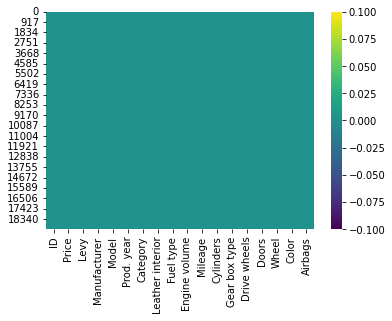

In [16]:
sns.heatmap(data.isnull(), cmap='viridis')

Our heatmap looks clean on each of the columns. <br>
now we can categoricaly say our dataset is void of missing values

### Data cleaning <a class="anchor" id="DC"></a>
For the dataset to be ready for training we have to clean it and ensure that the data makes logical sense



In [17]:
data.sample(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2188,45803201,13172.0,891,HYUNDAI,Sonata,2016,Sedan,Yes,LPG,2,503679 km,4.0,Automatic,Front,04-May,Left wheel,Orange,4
17100,45802313,14113.0,-,MERCEDES-BENZ,C 200,2006,Sedan,Yes,Petrol,2,142431 km,4.0,Tiptronic,Rear,04-May,Left wheel,Black,6
16679,45772522,1646.0,1750,TOYOTA,Highlander,2008,Jeep,Yes,Hybrid,3.3,269162 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


<b>Note</b> that the Mileage column has 'km' attached to it and Doors as well has some 'May' attached to it. so we will strip the attachment off so we can have a clean column to present to the model

<b>Note</b> also that we may not have missing data but we have data in some columns that doesn't make sense such as '-' in Levy column(it will be handled below)

In [18]:
## Creating a new columns fro mileage and door
new = data['Mileage'].str.split(' ', n=1, expand =True)
data['New_mil'] = new[0]
data['New_mil'] = pd.to_numeric(data['New_mil'])

In [19]:
## splitting door collums
door = data['Doors'].str.split('-', n=1, expand =True)
data['New_doors'] = door[0]

In [20]:
data['New_doors'].unique()
#data.head()

array(['04', '02', '>5'], dtype=object)

In [21]:
# checking for wrong entries such as special symbols e.g -,?,*,#,$ etc.
for col in data.columns:
    print('{} : {}'.format(col, data[col].unique()))

ID : [45654403 44731507 45774419 ... 45804997 45793526 45813273]
Price : [13328. 16621.  8467. ... 56814. 63886. 22075.]
Levy : ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090

It appears we have two special character '-' and '>' for Levy and New_doors respectively.

It appears we still have a column to split. In the 'engine volume' column, some of the values has turbo and some doesn't so we will split and remove the turbo so it will remain the numbers alone

In [22]:
## Creating a new columns fro mileage and door
eng_vol = data['Engine volume'].str.split(' ', n=1, expand =True)
data['New_engine_volume'] = eng_vol[0]
data['New_engine_volume'] = pd.to_numeric(data['New_engine_volume'])

<AxesSubplot:xlabel='New_doors', ylabel='count'>

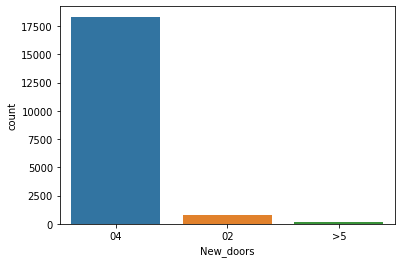

In [23]:
sns.countplot(data=data, x='New_doors')

Since we only have three (3) categories of new doors e.g cars with 4-doors, cars with 2-doors and cars with more than 5-doors.

Let's take a look at the Levy column

In [24]:
data[data['Levy'] == '-']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,New_mil,New_doors,New_engine_volume
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,...,4.0,Variator,Front,04-May,Right-hand drive,Black,2,200000,04,1.3
9,45756839,26657.0,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,...,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,128500,04,3.5
11,45814819,8781.0,-,FORD,Transit,1999,Microbus,No,CNG,4,...,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0,0,02,4.0
12,45815568,3000.0,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,...,4.0,Manual,Front,04-May,Left wheel,White,4,350000,04,1.6
23,45814106,7840.0,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,...,4.0,Manual,Front,02-Mar,Left wheel,White,0,230000,02,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781.0,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,...,4.0,Automatic,Front,04-May,Left wheel,Blue,4,0,04,2.4
19224,45768089,19130.0,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,...,4.0,Automatic,Front,04-May,Left wheel,Black,12,35800,04,2.4
19226,45796788,7840.0,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,...,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0,220000,04,3.0
19229,39977395,50.0,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,...,4.0,Automatic,Front,04-May,Left wheel,Silver,6,150000,04,1.5


We obviously can't make use of 'Levy' column because the missing value is too much so as such we will be droping the column.

The list of columns that we will be droping are:ID, Levy Mileage, Drive wheels, Doors

In [25]:
data = data.drop(['ID','Levy', 'Mileage', 'Drive wheels', 'Doors', 'Engine volume'], axis = 1)

##### Correlation with Target (Price) column

In [26]:
data['Price'].corr(data['Prod. year'])

0.2862518716542936

In [27]:
data['Price'].corr(data['New_engine_volume'])

0.13040845662604442

<AxesSubplot:>

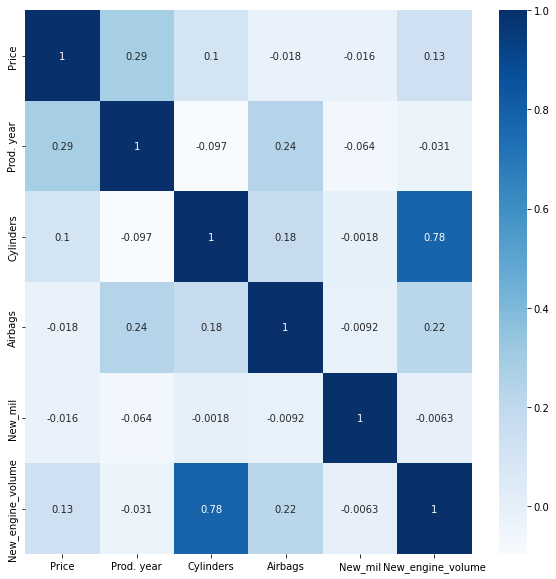

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Blues')

<b><u>Note:</u></b> 0.6 and above is considered as good correlation here<br>
- New_engine_volume and cylinder seems to be the only columns that are highly correlated with 0.78

## Training ML-Model<a class="anchor" id="model"></a>

In [30]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Wheel,Color,Airbags,New_mil,New_doors,New_engine_volume
0,13328.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,6.0,Automatic,Left wheel,Silver,12,186005,04,3.5
1,16621.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,6.0,Tiptronic,Left wheel,Black,8,192000,04,3.0
2,8467.0,HONDA,FIT,2006,Hatchback,No,Petrol,4.0,Variator,Right-hand drive,Black,2,200000,04,1.3
3,3607.0,FORD,Escape,2011,Jeep,Yes,Hybrid,4.0,Automatic,Left wheel,White,0,168966,04,2.5
4,11726.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,4.0,Automatic,Left wheel,Silver,4,91901,04,1.3


### Data preprocessing <a class="anchor" id="preprocessing"></a>

In [31]:
input_cols = list(data.columns)[1:]
target_col = ['Price']

we are specifying the columns we need here the input columns includes everything left after dropping the unneccessary and target columns

In [32]:
train_inputs = data[input_cols].copy()
train_targets = data[target_col].copy()

In [33]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [34]:
print('This are the numerical columns: ', numeric_cols)
print('This are the categorical columns: ', categorical_cols)

This are the numerical columns:  ['Prod. year', 'Cylinders', 'Airbags', 'New_mil', 'New_engine_volume']
This are the categorical columns:  ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Wheel', 'Color', 'New_doors']


We defined new variables here to seperate the dataset into training input and target column. After which we seperated the numerical columns from the categorical columns so that the scaling of the numerical and the ecoding of the categorical columns will be easier to define

### Scaling Numerical Features <a class="anchor" id="SNF"></a>

In [35]:
scaler = MinMaxScaler().fit(data[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
#X_test[input_cols] = scaler.transform(X_test[input_cols])

In [36]:
train_inputs.describe().loc[['min', 'max']]

,Prod. year,Cylinders,Airbags,New_mil,New_engine_volume
min,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0


### Encoding Categorical Columns <a class="anchor" id="ECC"></a>

In [40]:
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore').fit(data[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out (categorical_cols))

In [41]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

In [42]:
# Spliting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(train_inputs[numeric_cols + encoded_cols], train_targets, test_size=0.2,random_state=42)

In [43]:
X_train.head()

,Prod. year,Cylinders,Airbags,New_mil,New_engine_volume,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,...,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,New_doors_04,New_doors_>5
7808,0.913580,0.200000,0.750,0.000105,0.125,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
16766,0.839506,0.200000,0.250,0.000035,0.100,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7285,0.876543,0.333333,0.750,0.000088,0.175,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15712,0.901235,0.200000,0.250,0.000102,0.100,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16562,0.753086,0.333333,0.375,0.000012,0.150,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [44]:
# This function evaluates the train dataset
#, ,  
def train_acc_model(models):
    r_mean_sqr_le = []
    #mean_squared_err = []
    execution_time_list = []
    model_name_list = []
    r2_score_ = []
    r_mean_squared_err = []
    mean_absolute_err = []
    #print('Training dataset Evaluation with different metrix')
    
    for model in models:
        
        start = time.time()
        model.fit(X_train, y_train.values.ravel())
        end = time.time()
        
        model_name_list.append(type(model).__name__)

        #model prediction
        train_preds = model.predict(X_train)

        # RMSLE
        rmsle = np.log(np.sqrt(mean_squared_error(y_train, train_preds)))
        r_mean_sqr_le.append(rmsle)

        # MAE 
        mae = mean_absolute_error(y_train, train_preds)
        mean_absolute_err.append(mae)

        # MSE 
        #mse = mean_squared_error(y_train, train_preds)
        #mean_squared_err.append(mse)

        # R2 score
        r2_scor = r2_score(y_train, train_preds)
        r2_score_.append(r2_scor)

        # RMSE
        rmse = np.sqrt(mean_squared_error(y_train, train_preds))
        r_mean_squared_err.append(rmse)
        
        execution_time_list.append(end-start)

        Dict = {'Model':model_name_list,
                'Execution Time(sec)':execution_time_list,
                'Root Mean Squared Log Error':r_mean_sqr_le, 
                #'Mean Squared Error':mean_squared_err,
                'R2 Score':r2_score_,
                'Root Mean Squared Error':r_mean_squared_err, 
                'Mean Absolute Error':mean_absolute_err}
    return pd.DataFrame(Dict) 

In [49]:
# This function evaluates the test dataset
def test_acc_model(models):
    r_mean_sqr_le = []
    #mean_squared_err = []
    execution_time_list = []
    model_name_list = []
    r2_score_ = []
    r_mean_squared_err = []
    mean_absolute_err = []
    feature_importance = []
    feature_imp_name = []
    
    #print('Evaluating Validation dataset with different metrix')
    
    for model in models:
        start = time.time()
        model.fit(X_train, y_train.values.ravel())
        end = time.time()
        try:
            feature_importance.append(pd.DataFrame({
                (str(model) + ': Features'): X_train.columns,
                'Importance': model.feature_importances_
            }).sort_values('Importance', ascending=False))
        except:
            pass
        
        model_name_list.append(type(model).__name__)

        #model prediction
        test_preds = model.predict(X_test)

        # RMSLE
        rmsle = np.log(np.sqrt(mean_squared_error(y_test, test_preds)))
        r_mean_sqr_le.append(rmsle)

        # MAE 
        mae = mean_absolute_error(y_test, test_preds)
        mean_absolute_err.append(mae)

        # MSE 
        #mse = mean_squared_error(y_test, test_preds)
        #mean_squared_err.append(mse)

        # R2 score
        r2_scor = r2_score(y_test, test_preds)
        r2_score_.append(r2_scor)

        # RMSE
        rmse = np.sqrt(mean_squared_error(y_test, test_preds))
        r_mean_squared_err.append(rmse)
        
        execution_time_list.append(end-start)

        Dict = {'Model':model_name_list,
                'Execution Time(sec)':execution_time_list,
                'Root Mean Squared Log Error':r_mean_sqr_le, 
                #'Mean Squared Error':mean_squared_err,
                'R2 Score':r2_score_,
                'Root Mean Squared Error':r_mean_squared_err, 
                'Mean Absolute Error':mean_absolute_err}

    #feat_imp_dict = {'Model name':feature_imp_name,
     #                'Feature Importance':feature_importance}
    
    return pd.DataFrame(Dict), feature_importance

In [46]:
models = [SGDRegressor(), 
          LinearRegression(),
          GradientBoostingRegressor(), 
          AdaBoostRegressor(), 
          ExtraTreeRegressor(), 
          DecisionTreeRegressor(), 
          BaggingRegressor()
         ]

In [47]:
train_acc_model(models)

,Model,Execution Time(sec),Root Mean Squared Log Error,R2 Score,Root Mean Squared Error,Mean Absolute Error
0,SGDRegressor,67.874116,9.514489,0.459060,13554.704921,8663.513896
1,LinearRegression,4.181279,9.400377,0.569441,12092.944806,7832.008399
2,GradientBoostingRegressor,24.010130,9.340065,0.618366,11385.152495,7521.067209
3,AdaBoostRegressor,32.638718,9.960649,-0.320318,21176.527497,17925.870743
4,ExtraTreeRegressor,1.275310,7.593614,0.988394,1985.476593,228.077597
5,DecisionTreeRegressor,1.172517,7.593633,0.988393,1985.514653,228.195451
6,BaggingRegressor,8.162446,8.453466,0.935203,4691.305612,1929.573107


In [51]:
testing_acc, feature_importance = test_acc_model(models)

In [52]:
testing_acc

,Model,Execution Time(sec),Root Mean Squared Log Error,R2 Score,Root Mean Squared Error,Mean Absolute Error
0,SGDRegressor,67.062442,9.552900,3.632767e-01,1.408548e+04,8.778847e+03
1,LinearRegression,4.792553,32.484979,-5.278394e+19,1.282470e+14,1.677600e+13
2,GradientBoostingRegressor,23.949059,9.457913,4.734420e-01,1.280913e+04,7.702984e+03
3,AdaBoostRegressor,30.360019,9.945809,-3.970983e-01,2.086459e+04,1.756642e+04
4,ExtraTreeRegressor,1.281806,9.363047,5.644412e-01,1.164983e+04,5.260603e+03
5,DecisionTreeRegressor,1.180437,9.345311,5.796204e-01,1.144504e+04,5.193942e+03
6,BaggingRegressor,8.289532,9.232375,6.646130e-01,1.022279e+04,4.625758e+03


In [ ]:
'''
instance_pred = {'Model'= , 
                 'Prod. year'= '', 
                 'Leather interior'='', 
                 'Fuel type'='', 
                 'Cylinders'= , 
                 'Gear box type'= , 
                 'Wheel'= , 
                 'Color'= , 
                 'Airbags'= , 
                 'Mileage'= , 
                 'Doors'= , 
                 'Engines'= 
                }
'''

### Feature Importance <a class="anchor" id="featureImp"></a>

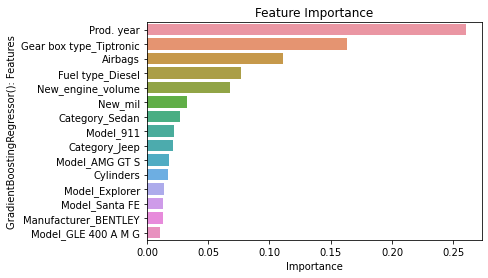

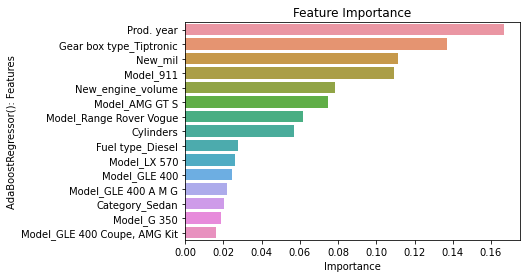

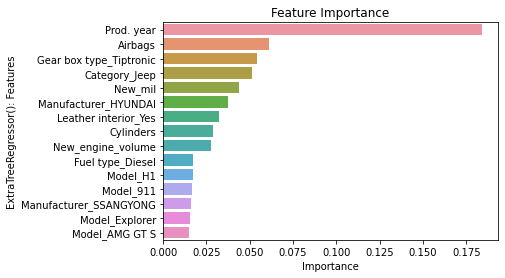

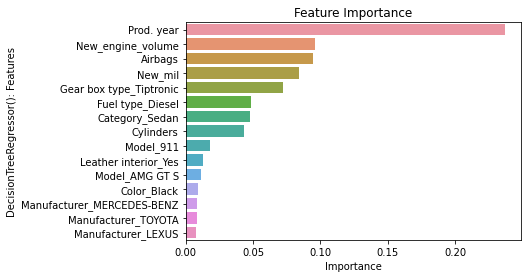

In [56]:
# initializing to index 0 to plot feature for first model
for each_model in range(len(feature_importance)):
    plt.title('Feature Importance')
    sns.barplot(data=feature_importance[each_model].head(15), x='Importance', y = feature_importance[each_model].columns[0]);
    plt.show()

The graphical representation of the feature importance above shows the top (15) importance from the top most priority to the least priority.
It is observed that for each of the four graph plotted 'Product year' standsout the most then from the second feature it varies for the different algorithms

## Conclusion <a class="anchor" id="conclusion"></a>

In this dataset we were able to train (7) different models on the car prediction dataset.<br>
We did some preprocessing as the dataset contains irrelevant columns and values in some columns that wouldn't make sense too our model. <br>
Next we splitted the dataset into numerical and categorical columns and preprocess each.<br>
We normalized the numerical columns and OneHotEncoded the categorical column and then we trained our model and tested it on the test dataset we created.<br>
Finally we plotted some graph showing the feature inportace for the models.